In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('anomaly_data3.csv')
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [3]:
df = df.dropna()
df

,timestamp,cpu_used,memory_used
0,2023-12-04 22:00:00+00:00,35.615334,468660.396654
1,2023-12-04 22:05:00+00:00,29.054768,528183.417930
2,2023-12-04 22:10:00+00:00,27.904288,503466.636068
3,2023-12-04 22:15:00+00:00,32.551675,501880.846128
4,2023-12-04 22:20:00+00:00,29.610737,513080.138453
...,...,...,...
995,2023-12-08 08:55:00+00:00,42.928792,553074.036016
996,2023-12-08 09:00:00+00:00,45.187751,589031.900644
997,2023-12-08 09:05:00+00:00,41.657785,569168.485539
998,2023-12-08 09:10:00+00:00,41.335738,577366.220569


In [4]:
df[' cpu_used'] = df[' cpu_used']/100
df

,timestamp,cpu_used,memory_used
0,2023-12-04 22:00:00+00:00,0.356153,468660.396654
1,2023-12-04 22:05:00+00:00,0.290548,528183.417930
2,2023-12-04 22:10:00+00:00,0.279043,503466.636068
3,2023-12-04 22:15:00+00:00,0.325517,501880.846128
4,2023-12-04 22:20:00+00:00,0.296107,513080.138453
...,...,...,...
995,2023-12-08 08:55:00+00:00,0.429288,553074.036016
996,2023-12-08 09:00:00+00:00,0.451878,589031.900644
997,2023-12-08 09:05:00+00:00,0.416578,569168.485539
998,2023-12-08 09:10:00+00:00,0.413357,577366.220569


In [5]:
df['lag_1'] = df[' cpu_used'].shift(1)
df['lag_2'] = df[' cpu_used'].shift(2)

df = df.dropna()
df

,timestamp,cpu_used,memory_used,lag_1,lag_2
2,2023-12-04 22:10:00+00:00,0.279043,503466.636068,0.290548,0.356153
3,2023-12-04 22:15:00+00:00,0.325517,501880.846128,0.279043,0.290548
4,2023-12-04 22:20:00+00:00,0.296107,513080.138453,0.325517,0.279043
5,2023-12-04 22:25:00+00:00,0.308195,470732.736776,0.296107,0.325517
6,2023-12-04 22:30:00+00:00,0.346798,510988.079481,0.308195,0.296107
...,...,...,...,...,...
995,2023-12-08 08:55:00+00:00,0.429288,553074.036016,0.415334,0.429527
996,2023-12-08 09:00:00+00:00,0.451878,589031.900644,0.429288,0.415334
997,2023-12-08 09:05:00+00:00,0.416578,569168.485539,0.451878,0.429288
998,2023-12-08 09:10:00+00:00,0.413357,577366.220569,0.416578,0.451878


In [6]:
X_cpu = df[[' cpu_used', 'lag_1', 'lag_2']].to_numpy()
X_cpu

array([[0.27904288, 0.29054768, 0.35615334],
       [0.32551675, 0.27904288, 0.29054768],
       [0.29610737, 0.32551675, 0.27904288],
       ...,
       [0.41657785, 0.45187751, 0.42928792],
       [0.41335738, 0.41657785, 0.45187751],
       [0.3824102 , 0.41335738, 0.41657785]])

In [7]:
cpu_model = tf.keras.models.load_model('./cpu_model_2_3.h5')

In [8]:
cpu_predict = cpu_model.predict(X_cpu)

32/32 [==============================] - 0s 1ms/step


In [9]:
cpu_data = df.copy()

In [10]:
cpu_data['anomaly'] = np.where(cpu_predict > 0.5, 1, 0)
cpu_data

,timestamp,cpu_used,memory_used,lag_1,lag_2,anomaly
2,2023-12-04 22:10:00+00:00,0.279043,503466.636068,0.290548,0.356153,0
3,2023-12-04 22:15:00+00:00,0.325517,501880.846128,0.279043,0.290548,0
4,2023-12-04 22:20:00+00:00,0.296107,513080.138453,0.325517,0.279043,0
5,2023-12-04 22:25:00+00:00,0.308195,470732.736776,0.296107,0.325517,0
6,2023-12-04 22:30:00+00:00,0.346798,510988.079481,0.308195,0.296107,0
...,...,...,...,...,...,...
995,2023-12-08 08:55:00+00:00,0.429288,553074.036016,0.415334,0.429527,0
996,2023-12-08 09:00:00+00:00,0.451878,589031.900644,0.429288,0.415334,0
997,2023-12-08 09:05:00+00:00,0.416578,569168.485539,0.451878,0.429288,0
998,2023-12-08 09:10:00+00:00,0.413357,577366.220569,0.416578,0.451878,0


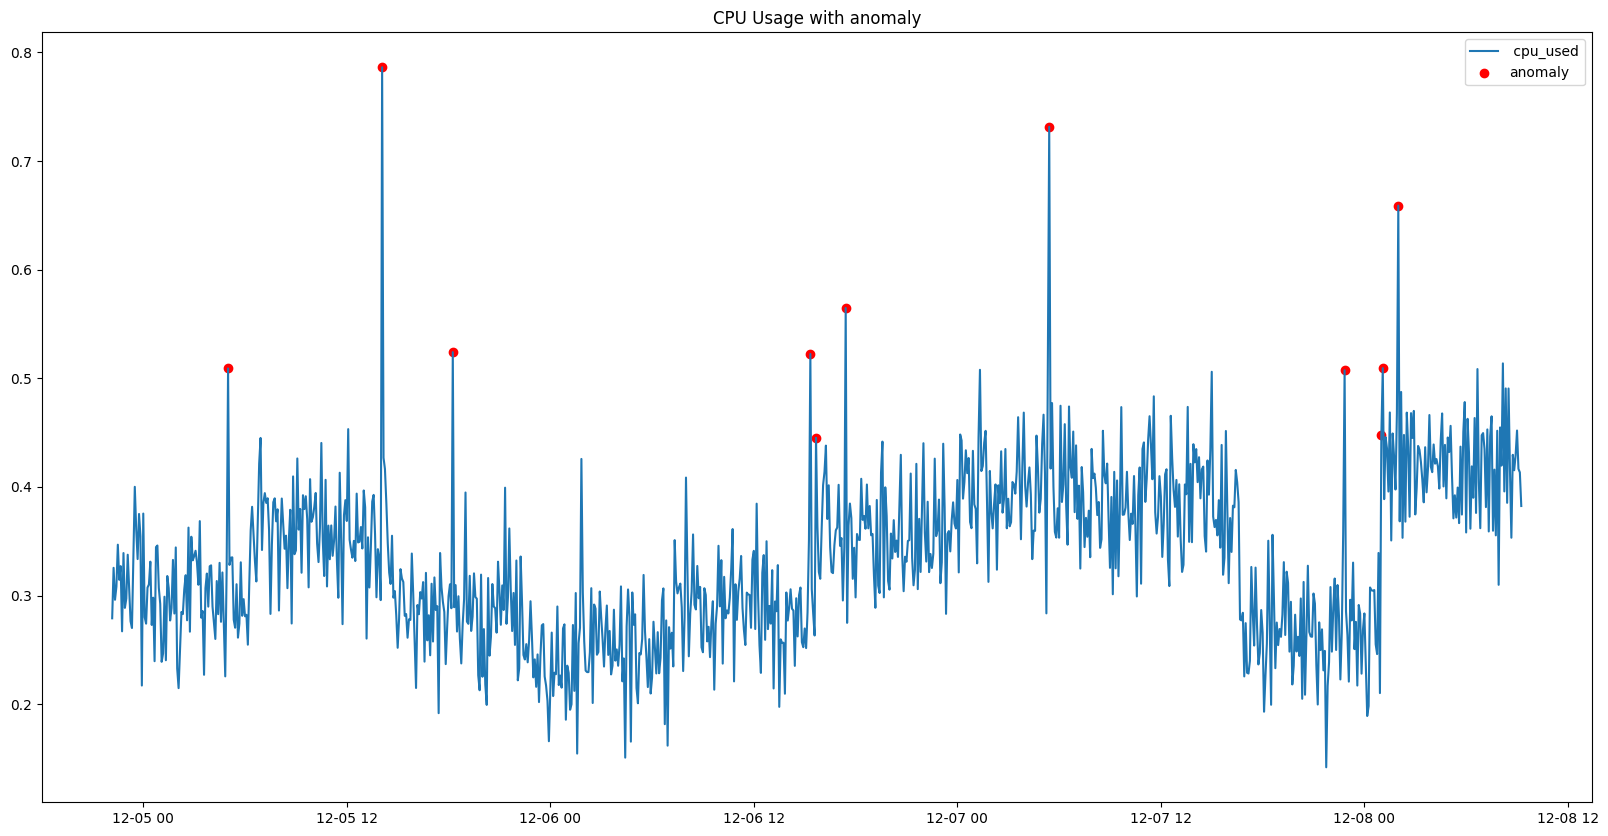

Total data = 998 
Anomaly found: 11 
Anomaly percentage: 1.1022044088176353 %


In [11]:
plt.figure(figsize=(20,10))
plt.plot(cpu_data['timestamp'], cpu_data[' cpu_used'], label=' cpu_used')
plt.scatter(cpu_data[cpu_data['anomaly'] == 1]['timestamp'], cpu_data[cpu_data['anomaly'] == 1][' cpu_used'], color='red', label='anomaly')
plt.legend()
# plt.xlim(pd.Timestamp('2023-12-22'), pd.Timestamp('2023-12-24'))
# plt.xlim(pd.Timestamp('2023-12-12'), pd.Timestamp('2023-12-18'))
plt.title('CPU Usage with anomaly')
plt.show()
print('Total data =', len(cpu_data), '\nAnomaly found:', len(cpu_data.where(cpu_data['anomaly'] == 1).dropna()), '\nAnomaly percentage:', len(cpu_data.where(cpu_data['anomaly'] == 1).dropna())/len(cpu_data)*100, '%')


In [12]:
#convert model to tfjs
import tensorflowjs as tfjs
tfjs.converters.save_keras_model(cpu_model, './cpu_model_2_3_tfjs')